In [47]:
import numpy as np
from matplotlib import pyplot as plt

# from known values as per the question
dx = 0.01
dt = 0.01

# loading the exported items from the previous case.
psi = np.load("psi.npy")
x = np.load("x.npy")
t = np.load("t.npy")


Part 3 of the question asks to validate the norm conservation of the CN operator.

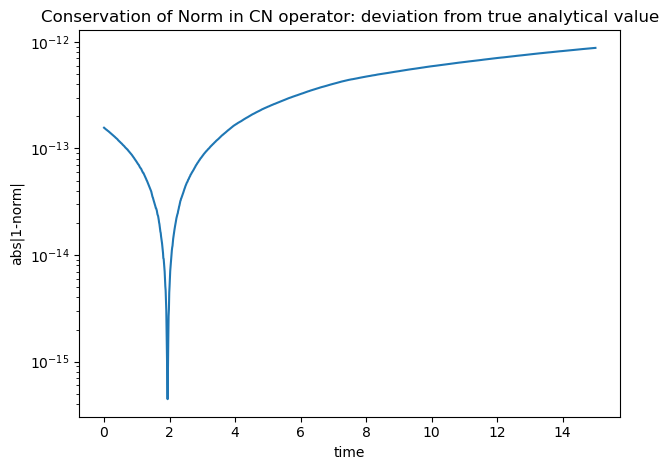

In [48]:
norms = np.zeros_like(t) # holds the norm at each timestep

# plotting the probability density of the states, traversing through the time evolution matrix
for i in range(0, len(psi)): # from 0 to 1500 time steps
    prob_density = np.abs(psi[i]) ** 2
    norms[i] = np.sum(prob_density * dx)
    
# Once we have the norms throughout the time range in question, we plot their deviation from the analytical value of the norm = 1.
# Due to the norm-conserving nature of the CN operator, the values throughout should hover around 1, with any variations being directly attributed to numerical dispersion errors due to the step sizes dx and dt

norms_deviation = np.zeros_like(t)
for i in range(0, len(t)):
    norms_deviation[i] = np.abs(1 - norms[i])
plt.plot(t, norms_deviation)
plt.yscale("log")
plt.title("Conservation of Norm in CN operator: deviation from true analytical value")
plt.xlabel("time")
plt.ylabel("abs|1-norm|")
plt.tight_layout()

Part 4 of the assignment asks to plot the probability densities at specific time steps, in order to assess the time evolution of the wavepacket incident at a step potential

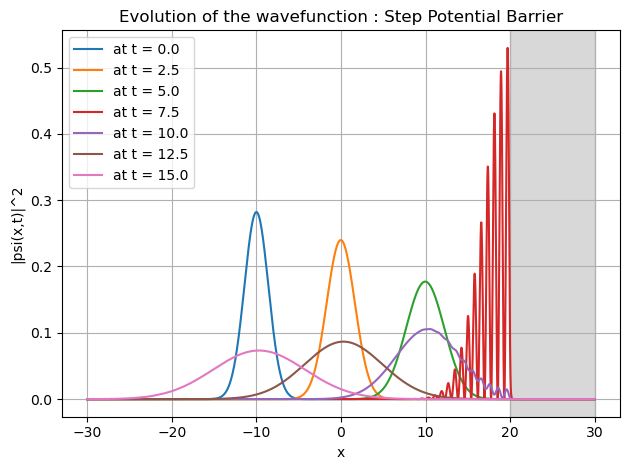

In [49]:
i = 0
for time in t:
    if time % 2.5 == 0 : # in time steps of 2.5s
        prob_density = np.abs(psi[i]) ** 2
        plt.plot(x, prob_density, label=f"at t = {time}")   
    i+=1 
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("|psi(x,t)|^2")
plt.title(f"Evolution of the wavefunction : Step Potential Barrier")
plt.axvspan(20, 30, color = "grey", alpha = 0.3)
plt.tight_layout()